# Project: Investigate a Dataset - [European Soccer Dataset]

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

    The European Soccer Dataset was gotten from Kaggle. It contains data about players, teams, soccer matches played and 
    individual player attributes. It is a huge dataset with 7 tables containing multiple columns and entries.
    For this Analysis, I focused on the Player Table and Player Attributes Table. Since the Data is stored in .sqlite on 
    kaggle. I installed SQLliteserver on my computer and JOIned the two tables using SQL.
    
    

![title](picture.png)

The player table contains 7 columns: id, player_api_id, player_name, player_fifa_api_id, birthday, height and weight
    
    The player_Attributes table contains 42 columns: id, player_fifa_api_id, player_api_id, date, overall_rating, potential,
    preferred_foot, attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing, volleys,
    dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance,
    shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking,
    standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes
    

### Question(s) for Analysis

     We first answer simple questions about our data for example tallest player, shortest player, Most improved player from         2007 to 2016, Player with the most potential.Then we answer complex questions

    Question1: Do players born in a specific month or year seem to have a better overall rating?
    Question2: Do left footed players have better potential?
    Question3: Do players with high Potential have Higher Ratings?


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


In [16]:
df = pd.read_csv('European_soccer_database.csv')
df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id.1,player_fifa_api_id.1,player_api_id.1,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    183978 non-null  int64  
 1   player_api_id         183978 non-null  int64  
 2   player_name           183978 non-null  object 
 3   player_fifa_api_id    183978 non-null  int64  
 4   birthday              183978 non-null  object 
 5   height                183978 non-null  float64
 6   weight                183978 non-null  int64  
 7   id.1                  183978 non-null  int64  
 8   player_fifa_api_id.1  183978 non-null  int64  
 9   player_api_id.1       183978 non-null  int64  
 10  date                  183978 non-null  object 
 11  overall_rating        183142 non-null  float64
 12  potential             183142 non-null  float64
 13  preferred_foot        183142 non-null  object 
 14  attacking_work_rate   180748 non-null  object 
 15  

# DATA CLEANING
  
  
Considering the questions posed above the following steps were taken to clean up the data and prepare the data for analysis. 

In [18]:
#First to make our analysis simpler from start. We will drop columns that are not part of our analysis
df=df.drop(['id', 'player_fifa_api_id', 'id.1', 'player_fifa_api_id.1', 'player_api_id.1', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
    'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking',
    'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes' ], axis=1)

In [19]:
df.head()

,player_api_id,player_name,birthday,height,weight,date,overall_rating,potential,preferred_foot
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0,71.0,right
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0,71.0,right
2,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0,66.0,right
3,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0,65.0,right
4,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0,65.0,right


In [20]:
#convert date column to date time format and then extract years and months and drop original columns

df['date']=pd.to_datetime(df['date'])
df['date_year'] = df['date'].dt.year
df['date_month'] = df['date'].dt.month
df=df.drop(['date'], axis=1)

In [21]:
#convert birthday column to date time format and then extract years and months and drop original columns
df['birthday']=pd.to_datetime(df['birthday'])
df['birth_year'] = df['birthday'].dt.year
df['birth_month'] = df['birthday'].dt.month
df=df.drop(['birthday'], axis=1)

In [22]:
#Check count of unique values for each year. Our interest is years 2016 and 2007 
df['date_year'].value_counts()

2013    38867
2014    32808
2015    31834
2007    16138
2016    14103
2012    12632
2011    11976
2010    10829
2009     8993
2008     5798
Name: date_year, dtype: int64

In [23]:
#Select data for years 2016 and 2007 and pass to new_dataFrames
df_2016=df[df['date_year'] == 2016]
df_2016
df_2007=df[df['date_year'] == 2007]
df_2007

,player_api_id,player_name,height,weight,overall_rating,potential,preferred_foot,date_year,date_month,birth_year,birth_month
4,505942,Aaron Appindangoye,182.88,187,61.0,65.0,right,2007,2,1992,2
37,155782,Aaron Cresswell,170.18,146,53.0,60.0,right,2007,2,1989,12
63,162549,Aaron Doran,170.18,163,59.0,70.0,right,2007,2,1991,5
85,30572,Aaron Galindo,182.88,198,71.0,78.0,right,2007,8,1982,5
86,30572,Aaron Galindo,182.88,198,71.0,78.0,right,2007,2,1982,5
...,...,...,...,...,...,...,...,...,...,...,...
183959,36491,Zsolt Low,180.34,154,67.0,72.0,left,2007,2,1979,4
183966,35506,Zurab Khizanishvili,185.42,172,75.0,78.0,right,2007,8,1981,10
183967,35506,Zurab Khizanishvili,185.42,172,78.0,79.0,right,2007,2,1981,10
183976,39902,Zvjezdan Misimovic,180.34,176,78.0,81.0,right,2007,8,1982,6


In [24]:
#Inspecting the data. We notice that there can be more than one overall rating per player due to rating being awarded
#at different months. We further inspect the date_month column for the two years to find a basis for our analysis
df_2016['date_month'].value_counts()

3    3368
4    3260
1    3239
2    2374
5    1381
6     472
7       9
Name: date_month, dtype: int64

In [25]:
df_2007['date_month'].value_counts()

2    11794
8     4344
Name: date_month, dtype: int64

In [26]:
#Since month 2  february is common for both years. We select data for month 2 to make our analysis easier
df_2016_final = df_2016[df['date_month']==2]
df_2016_final
df_2007_final = df_2007[df['date_month']==2]
df_2007_final

<ipython-input-26-b93201dfed1f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2016_final = df_2016[df['date_month']==2]
<ipython-input-26-b93201dfed1f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2007_final = df_2007[df['date_month']==2]


,player_api_id,player_name,height,weight,overall_rating,potential,preferred_foot,date_year,date_month,birth_year,birth_month
4,505942,Aaron Appindangoye,182.88,187,61.0,65.0,right,2007,2,1992,2
37,155782,Aaron Cresswell,170.18,146,53.0,60.0,right,2007,2,1989,12
63,162549,Aaron Doran,170.18,163,59.0,70.0,right,2007,2,1991,5
86,30572,Aaron Galindo,182.88,198,71.0,78.0,right,2007,2,1982,5
111,23780,Aaron Hughes,182.88,154,75.0,75.0,right,2007,2,1979,11
...,...,...,...,...,...,...,...,...,...,...,...
183936,26357,Zoumana Camara,182.88,168,77.0,78.0,right,2007,2,1979,4
183952,111182,Zsolt Laczko,182.88,176,67.0,77.0,left,2007,2,1986,12
183959,36491,Zsolt Low,180.34,154,67.0,72.0,left,2007,2,1979,4
183967,35506,Zurab Khizanishvili,185.42,172,78.0,79.0,right,2007,2,1981,10


In [27]:
#check to see if date_month = 2 was dropped successfully
df_2007_final['date_month'].value_counts()
df_2016_final['date_month'].value_counts()

2    2374
Name: date_month, dtype: int64

In [28]:
#Now we check our data for consistency
df_2007_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 4 to 183977
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_api_id   11794 non-null  int64  
 1   player_name     11794 non-null  object 
 2   height          11794 non-null  float64
 3   weight          11794 non-null  int64  
 4   overall_rating  11059 non-null  float64
 5   potential       11059 non-null  float64
 6   preferred_foot  11059 non-null  object 
 7   date_year       11794 non-null  int64  
 8   date_month      11794 non-null  int64  
 9   birth_year      11794 non-null  int64  
 10  birth_month     11794 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 1.1+ MB


In [29]:
df_2016_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2374 entries, 0 to 183903
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_api_id   2374 non-null   int64  
 1   player_name     2374 non-null   object 
 2   height          2374 non-null   float64
 3   weight          2374 non-null   int64  
 4   overall_rating  2373 non-null   float64
 5   potential       2373 non-null   float64
 6   preferred_foot  2373 non-null   object 
 7   date_year       2374 non-null   int64  
 8   date_month      2374 non-null   int64  
 9   birth_year      2374 non-null   int64  
 10  birth_month     2374 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 222.6+ KB


In [30]:
#merge datasets with common attributes
df_combined = df_2016_final.merge(df_2007_final, on=['player_api_id','player_name','height','weight','preferred_foot','birth_year','birth_month','date_month'], how='left')
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2374 entries, 0 to 2373
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_api_id     2374 non-null   int64  
 1   player_name       2374 non-null   object 
 2   height            2374 non-null   float64
 3   weight            2374 non-null   int64  
 4   overall_rating_x  2373 non-null   float64
 5   potential_x       2373 non-null   float64
 6   preferred_foot    2373 non-null   object 
 7   date_year_x       2374 non-null   int64  
 8   date_month        2374 non-null   int64  
 9   birth_year        2374 non-null   int64  
 10  birth_month       2374 non-null   int64  
 11  overall_rating_y  2126 non-null   float64
 12  potential_y       2126 non-null   float64
 13  date_year_y       2127 non-null   float64
dtypes: float64(6), int64(6), object(2)
memory usage: 278.2+ KB


In [31]:
#the value_counts() method gives us the idea that missing values are present since the row counts are 
#unequal. We ncheck for number of missing values
df_combined.isna().sum()

player_api_id         0
player_name           0
height                0
weight                0
overall_rating_x      1
potential_x           1
preferred_foot        1
date_year_x           0
date_month            0
birth_year            0
birth_month           0
overall_rating_y    248
potential_y         248
date_year_y         247
dtype: int64

In [32]:
#we drop all missing values
df_combined.dropna(inplace=True)
#check if our method works\
df_combined.isna().sum()

player_api_id       0
player_name         0
height              0
weight              0
overall_rating_x    0
potential_x         0
preferred_foot      0
date_year_x         0
date_month          0
birth_year          0
birth_month         0
overall_rating_y    0
potential_y         0
date_year_y         0
dtype: int64

In [33]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2373
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_api_id     2126 non-null   int64  
 1   player_name       2126 non-null   object 
 2   height            2126 non-null   float64
 3   weight            2126 non-null   int64  
 4   overall_rating_x  2126 non-null   float64
 5   potential_x       2126 non-null   float64
 6   preferred_foot    2126 non-null   object 
 7   date_year_x       2126 non-null   int64  
 8   date_month        2126 non-null   int64  
 9   birth_year        2126 non-null   int64  
 10  birth_month       2126 non-null   int64  
 11  overall_rating_y  2126 non-null   float64
 12  potential_y       2126 non-null   float64
 13  date_year_y       2126 non-null   float64
dtypes: float64(6), int64(6), object(2)
memory usage: 249.1+ KB


In [34]:
#rename columns, drop date_month column and change data types. We don't need date month columns anymore since all the data is for february i.e 2
df_combined.drop(['date_month','date_year_x','date_year_y'], axis=1, inplace=True)
df_combined.rename(columns={'overall_rating_x':'overall_rating_2016','overall_rating_y':'overall_rating_2007', 'potential_x':'potential_2016', 'potential_y':'potential_2007'}, inplace=True)
df_combined.head()

,player_api_id,player_name,height,weight,overall_rating_2016,potential_2016,preferred_foot,birth_year,birth_month,overall_rating_2007,potential_2007
0,505942,Aaron Appindangoye,182.88,187,67.0,71.0,right,1992,2,61.0,65.0
1,27316,Aaron Hunt,182.88,161,77.0,77.0,left,1986,9,73.0,80.0
2,564793,Aaron Kuhl,172.72,146,61.0,75.0,right,1996,1,60.0,77.0
3,528212,Aaron Lennox,190.50,181,48.0,56.0,right,1993,2,48.0,57.0
4,231592,Aaron Mooy,175.26,150,75.0,78.0,right,1990,9,60.0,67.0


In [35]:
#check for duplicates
df_combined.duplicated().sum()

205

In [36]:
#remove duplicates
df_combined.drop_duplicates(inplace=True)
df_combined.duplicated().sum()

0

In [37]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 0 to 2373
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_api_id        1921 non-null   int64  
 1   player_name          1921 non-null   object 
 2   height               1921 non-null   float64
 3   weight               1921 non-null   int64  
 4   overall_rating_2016  1921 non-null   float64
 5   potential_2016       1921 non-null   float64
 6   preferred_foot       1921 non-null   object 
 7   birth_year           1921 non-null   int64  
 8   birth_month          1921 non-null   int64  
 9   overall_rating_2007  1921 non-null   float64
 10  potential_2007       1921 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 180.1+ KB


In [38]:
#We try to understand our cleaned up data
df_combined.describe()

,player_api_id,height,weight,overall_rating_2016,potential_2016,birth_year,birth_month,overall_rating_2007,potential_2007
count,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000,1921.000000
mean,223838.122332,181.933285,167.931806,69.780843,73.593961,1989.445601,5.746486,61.736596,71.990109
std,187361.663153,6.303563,14.790764,6.159543,5.931172,4.409776,3.537709,7.598339,7.515983
min,5016.000000,162.560000,126.000000,48.000000,54.000000,1975.000000,1.000000,38.000000,45.000000
25%,49847.000000,177.800000,159.000000,66.000000,70.000000,1986.000000,2.000000,57.000000,67.000000
50%,179083.000000,182.880000,168.000000,70.000000,74.000000,1990.000000,5.000000,61.000000,72.000000
75%,311008.000000,185.420000,176.000000,74.000000,78.000000,1993.000000,9.000000,66.000000,77.000000
max,750435.000000,203.200000,218.000000,90.000000,94.000000,1999.000000,12.000000,88.000000,93.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Do players born in a specific month or year have better overall rating? 

In [ ]:
#First before answering any questions, I like to look at the heat map for correlations

[Text(0.5, 1.0, 'Correlation Plot')]

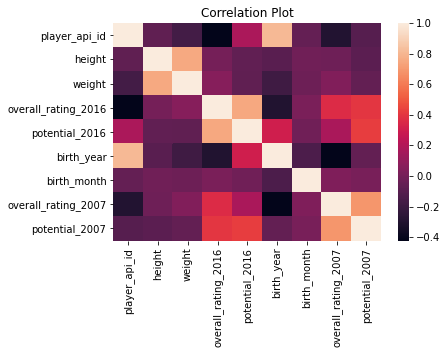

In [44]:
sns.heatmap(df_combined.corr()).set(title='Correlation Plot')
#It appears that a few correlation exist in our database. For example, potential seems to correlate with overall ratings

It appears that a few correlation exist in our database. For example, potential seems to correlate with overall ratings and weight and height seem to have some correlation

In [45]:
df_combined.head()

,player_api_id,player_name,height,weight,overall_rating_2016,potential_2016,preferred_foot,birth_year,birth_month,overall_rating_2007,potential_2007
0,505942,Aaron Appindangoye,182.88,187,67.0,71.0,right,1992,2,61.0,65.0
1,27316,Aaron Hunt,182.88,161,77.0,77.0,left,1986,9,73.0,80.0
2,564793,Aaron Kuhl,172.72,146,61.0,75.0,right,1996,1,60.0,77.0
3,528212,Aaron Lennox,190.50,181,48.0,56.0,right,1993,2,48.0,57.0
4,231592,Aaron Mooy,175.26,150,75.0,78.0,right,1990,9,60.0,67.0


<AxesSubplot:title={'center':'Distribution of Left versus Right Footed players'}, ylabel='preferred_foot'>

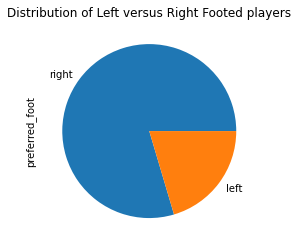

In [46]:
#Distribution of left-footed and right-footed players
df_combined['preferred_foot'].value_counts().plot(kind='pie', title='Distribution of Left versus Right Footed players')

There appears to be more right footed players than left footed ones 

In [47]:
#The maximum height of players
df_combined['height'].max()

203.2

In [48]:
#Tallest player
df_combined[df_combined['height']==df_combined['height'].max()].player_name

2251    Vanja Milinkovic-Savic
Name: player_name, dtype: object

In [49]:
#The minimum height of players
df_combined['height'].min()

162.56

In [50]:
#Shortest player
df_combined[df_combined['height']==df_combined['height'].min()].player_name

221      Bakari Kone
1767    Pablo Piatti
Name: player_name, dtype: object

In [51]:
#Most Improved player rating from 2007 to 2016
df_combined['difference']=df_combined['overall_rating_2016'] - df_combined['overall_rating_2007']
df_combined[df_combined['difference']==df_combined['difference'].max()].player_name

1251    Lamine Kone
Name: player_name, dtype: object

In [52]:
#Player with the most potential in 2016
df_combined[df_combined['potential_2016']==df_combined['potential_2016'].max()].player_name

1684    Neymar
Name: player_name, dtype: object

<AxesSubplot:title={'center':'Distribution of players by birth month'}, ylabel='Frequency'>

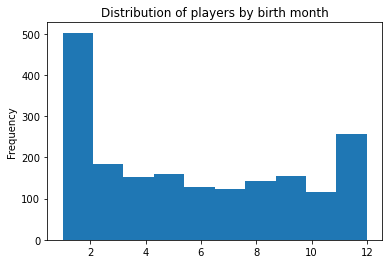

In [67]:
df_combined['birth_month'].plot(kind='hist', title='Distribution of players by birth month')
#The month of february,2 has the highest number of players

The month of february has the highest number of player births with about 500 births

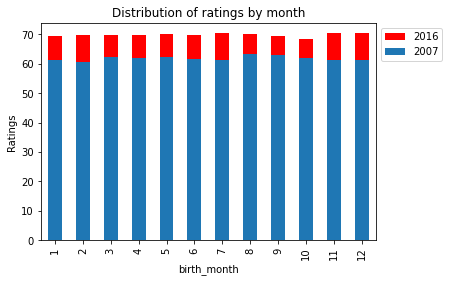

In [90]:
ax1=df_combined.groupby('birth_month')['overall_rating_2016'].mean().plot(kind='bar', color='red')
df_combined.groupby('birth_month')['overall_rating_2007'].mean().plot(kind='bar',ax=ax1,title='Distribution of ratings by month',ylabel='Ratings')
ax1.legend(['2016','2007'], bbox_to_anchor=(1.0, 1.0))

The distribution of birth months against ratings seems about equal. There is no significant difference although Players seem to have general overall rating in 2016. This could be true as players are known to get better with time(although not all players). More data on players will be needed for further analysis

<AxesSubplot:title={'center':'Distribution of Birth Years'}, ylabel='Frequency'>

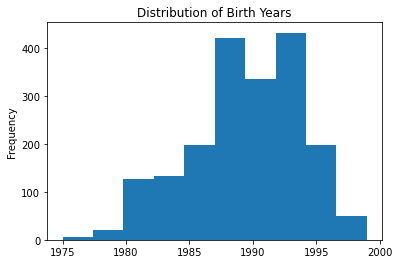

In [115]:
df_combined['birth_year'].plot(kind='hist', title='Distribution of Birth Years', xlabel='Years')
#Distribution of birth_year is slightly skewed to the left

The distribution of players birth years appears to be slightly skewed to the left

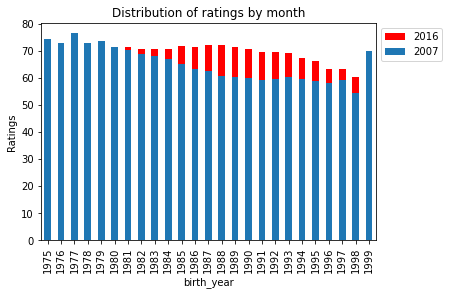

In [92]:
ax1=df_combined.groupby('birth_year')['overall_rating_2016'].mean().plot(kind='bar', color='red')
df_combined.groupby('birth_year')['overall_rating_2007'].mean().plot(kind='bar',ax=ax1,title='Distribution of ratings by Year',ylabel='Ratings')
ax1.legend(['2016','2007'], bbox_to_anchor=(1.0, 1.0))
#Ratings seem to drop off for 2007 with time while for 2016 it is slightly balanced

Ratings seem to drop off for year 2007 with time while for 2016 it drops off slightly but a bit balanced

Text(0, 0.5, 'Overall Ratings')

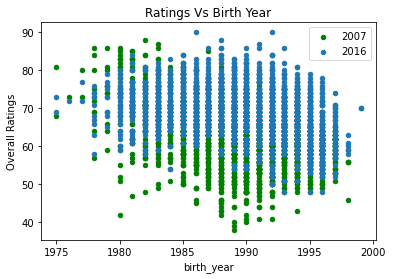

In [113]:
ax1=df_combined.plot(x='birth_year',y='overall_rating_2007',kind='scatter', color='green')
df_combined.plot(kind='scatter',ax=ax1,x='birth_year',y='overall_rating_2016', title='Ratings Vs Birth Year')
ax1.legend(['2007','2016'], bbox_to_anchor=(1.0, 1.0))
ax1.set_ylabel('Overall Ratings')
#There seems to be no correlation

There appears to be no obvious directional movement in the graph and so therefore no obvious correlation between ratings and birth year

Text(0, 0.5, 'Overall Ratings')

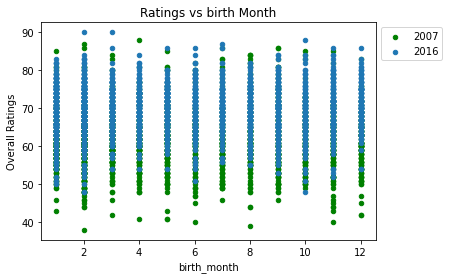

In [114]:
ax1=df_combined.plot(x='birth_month',y='overall_rating_2007',kind='scatter', color='green')
df_combined.plot(kind='scatter',ax=ax1,x='birth_month',y='overall_rating_2016', title='Ratings vs birth Month')
ax1.legend(['2007','2016'], bbox_to_anchor=(1.0, 1.0))
ax1.set_ylabel('Overall Ratings')
#There seems to be no correlation

There appears to be no correlation between overall ratings and birth month

### Research Question 2  (Do left footed players have better potential)

In [104]:
# 
df_combined[df_combined['preferred_foot']=='left'].potential_2016.mean()

73.65816326530613

In [105]:
df_combined[df_combined['preferred_foot']=='right'].potential_2007.mean()
#left footed players seems to have higher potential

71.74166121648136

In [106]:
df_combined.head()

,player_api_id,player_name,height,weight,overall_rating_2016,potential_2016,preferred_foot,birth_year,birth_month,overall_rating_2007,potential_2007,difference
0,505942,Aaron Appindangoye,182.88,187,67.0,71.0,right,1992,2,61.0,65.0,6.0
1,27316,Aaron Hunt,182.88,161,77.0,77.0,left,1986,9,73.0,80.0,4.0
2,564793,Aaron Kuhl,172.72,146,61.0,75.0,right,1996,1,60.0,77.0,1.0
3,528212,Aaron Lennox,190.50,181,48.0,56.0,right,1993,2,48.0,57.0,0.0
4,231592,Aaron Mooy,175.26,150,75.0,78.0,right,1990,9,60.0,67.0,15.0


In [117]:
### Do players with high Potential have Higher Ratings?

Text(0, 0.5, 'Overall Rating')

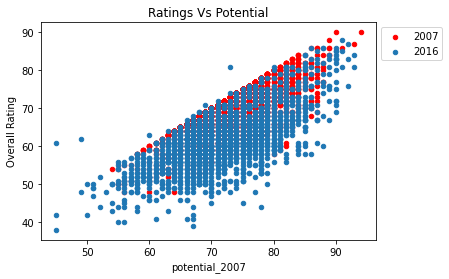

In [118]:
ax1=df_combined.plot(x='potential_2016',y='overall_rating_2016',kind='scatter', color='red')
df_combined.plot(kind='scatter',ax=ax1,x='potential_2007',y='overall_rating_2007', title='Ratings Vs Potential')
ax1.legend(['2007','2016'], bbox_to_anchor=(1.0, 1.0))
ax1.set_ylabel('Overall Rating')
#Potential seems to be correlated with Overall Artings

We notice that from the graph of Potential against Ratings. Increase in Ratings is associated with increase in Potential.
We can say that they are both correlated

<a id='conclusions'></a>
## Conclusions
Our data tells us that

1) The tallest player is Vanja Milinkovic-Savic with a height of about 203

2) The shortest player is Bakari Kone with a height of about 162

3) The most improved player rating from 2007 to 2016 is Lamine Kone

4) The player with the most potential in 2016 is Neymar

5) The distribution of left and right-footed players is unbalanced with the number of right footed players higher by significant margin.

6) A players birth month or birth year does not imply an improved or reduced rating

7) Players Potential is correlated with overall ratings. Players found to have high potentials were seen to have higher ratings

8) Left footed players have better potential on Average that right footed Players



### Limitations

The original source of data contained missing values and a lot of cleaning and data preparation had to be performed. Therefore, Data does not represent the true population count and characteristics. Conclusions draw from this dataset are solely for  

#### Other areas to explore

1) Relationship between overall_rating and potential for left-footed players?

2) Which player attributes contribute more to the overall rating?

3) Does player weight affect their overall rating? 

And so on. The data is really broad and so there are a lot of things to explore.

I'd love to do an ML project on this going forward
